In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('listings.csv', low_memory=False)

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20191204162709,2019-12-04,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,f,f,moderate,f,f,1,1,0,0,1.79
1,3850,https://www.airbnb.com/rooms/3850,20191204162709,2019-12-04,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.38
2,5858,https://www.airbnb.com/rooms/5858,20191204162709,2019-12-05,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.86
3,7918,https://www.airbnb.com/rooms/7918,20191204162709,2019-12-04,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.14
4,8142,https://www.airbnb.com/rooms/8142,20191204162709,2019-12-04,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.13


In [4]:
df.shape #get the number of columns and rows in dataset

(8533, 106)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 6.9+ MB


In [151]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url   

In [6]:
df.dropna(how = 'any').shape #would result in these many rows if we drop all rows that has any null columns 

(0, 106)

In [12]:
df.columns[df.isna().any()].tolist() #selecting the columns with null values

['summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'jurisdiction_names',
 'reviews_per_

In [156]:
len(df.columns[df.isna().any()].tolist())#selecting the columns with null values

53

In [14]:
df.loc[:, df.isna().any()].head() #showing what it looks like

,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,reviews_per_month
0,New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,...,97.0,10.0,10.0,10.0,10.0,10.0,9.0,STR-0001256,"{""SAN FRANCISCO""}",1.79
1,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,"This is a quiet, safe neighborhood on a substa...",House Rule footnotes: 1.\tI don’t allow check ...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",Airbnb has no default house rules that hosts c...,NaN,...,95.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-0000346,"{""SAN FRANCISCO""}",1.38
2,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",NaN,...,98.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,"{""SAN FRANCISCO""}",0.86
3,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",Wi-Fi signal in common areas. Large eat in k...,N Juda Muni and bus stop. Street parking.,NaN,NaN,"No party, No smoking, not for any kinds of smo...",NaN,...,86.0,8.0,8.0,9.0,9.0,9.0,8.0,NaN,"{""SAN FRANCISCO""}",0.14
4,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,NaN,Wi-Fi signal in common areas. Large eat in k...,"N Juda Muni, Bus and UCSF Shuttle. small shopp...",NaN,NaN,no pet no smoke no party inside the building,NaN,...,93.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,"{""SAN FRANCISCO""}",0.13


In [15]:
cols_num_missing = df.isnull().sum()
cols_num_missing

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1891
Length: 106, dtype: int64

In [16]:
len(df)

8533

In [17]:
df.shape

(8533, 106)

In [21]:
null_perc = cols_num_missing/len(df) 

In [25]:
null_perc.head(20)

id                       0.000000
listing_url              0.000000
scrape_id                0.000000
last_scraped             0.000000
name                     0.000000
summary                  0.024962
space                    0.141568
description              0.004805
experiences_offered      0.000000
neighborhood_overview    0.247392
notes                    0.388726
transit                  0.305403
access                   0.380171
interaction              0.328607
house_rules              0.267550
thumbnail_url            1.000000
medium_url               1.000000
picture_url              0.000000
xl_picture_url           1.000000
host_id                  0.000000
dtype: float64

In [33]:
df.isna().mean().round(4)*100 #second method, putting it on one line

id                                               0.00
listing_url                                      0.00
scrape_id                                        0.00
last_scraped                                     0.00
name                                             0.00
                                                ...  
calculated_host_listings_count                   0.00
calculated_host_listings_count_entire_homes      0.00
calculated_host_listings_count_private_rooms     0.00
calculated_host_listings_count_shared_rooms      0.00
reviews_per_month                               22.16
Length: 106, dtype: float64

In [26]:
df['medium_url']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8528   NaN
8529   NaN
8530   NaN
8531   NaN
8532   NaN
Name: medium_url, Length: 8533, dtype: float64

In [34]:
for col in df.loc[:, null_perc > .8]: #80% of data is null 
    print(col)

thumbnail_url
medium_url
xl_picture_url
host_acceptance_rate
neighbourhood_group_cleansed
square_feet
weekly_price
monthly_price


In [36]:
mostly_null_cols = list(df.loc[:, null_perc > .8]) #80% of data is null; second way of doing this

In [41]:
df2 = df.drop(columns = mostly_null_cols)

In [42]:
df2.shape

(8533, 98)

In [59]:
#formatting the numeric columns 

numeric_cols = ['price','security_deposit','cleaning_fee','extra_people']

In [112]:
#strip out the $ in the numeric columns

for col in numeric_cols: 
    df2[col] = df2[col].str.lstrip('$')
    df2[col] = df2[col].str.replace(',','').astype(float)
#     df2[col] = df2[col].strip(',')

In [113]:
df2[numeric_cols].head(20)

,price,security_deposit,cleaning_fee,extra_people
0,170.0,100.0,100.0,25.0
1,99.0,0.0,10.0,20.0
2,235.0,NaN,100.0,0.0
3,65.0,200.0,50.0,12.0
4,65.0,200.0,50.0,12.0
5,585.0,0.0,175.0,300.0
6,139.0,0.0,50.0,60.0
7,135.0,NaN,50.0,0.0
8,199.0,500.0,100.0,0.0
9,120.0,500.0,75.0,0.0


In [114]:
#changing object to integers
df2[numeric_cols].apply(pd.to_numeric, errors = 'coerce') #making it into a numeric 

,price,security_deposit,cleaning_fee,extra_people
0,170.0,100.0,100.0,25.0
1,99.0,0.0,10.0,20.0
2,235.0,NaN,100.0,0.0
3,65.0,200.0,50.0,12.0
4,65.0,200.0,50.0,12.0
...,...,...,...,...
8528,95.0,0.0,50.0,0.0
8529,55.0,NaN,NaN,0.0
8530,100.0,500.0,100.0,0.0
8531,295.0,NaN,NaN,0.0


In [115]:
df2[numeric_cols].dtypes

price               float64
security_deposit    float64
cleaning_fee        float64
extra_people        float64
dtype: object

In [116]:
#finding stats in numeric_cols
df2[numeric_cols].describe()

,price,security_deposit,cleaning_fee,extra_people
count,8533.000000,6774.000000,7574.000000,8533.000000
mean,215.412516,462.052849,109.764589,16.116958
std,300.296057,772.861169,92.543212,30.783535
min,0.000000,0.000000,0.000000,0.000000
25%,99.000000,0.000000,49.000000,0.000000
50%,150.000000,250.000000,95.000000,0.000000
75%,235.000000,500.000000,150.000000,25.000000
max,10000.000000,5100.000000,688.000000,300.000000


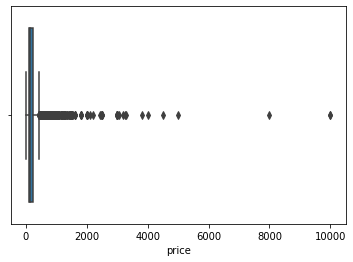

In [118]:
sns.boxplot(df2['price'])

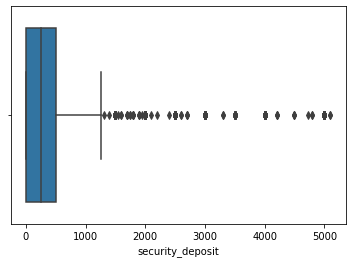

In [119]:
sns.boxplot(df2['security_deposit'])

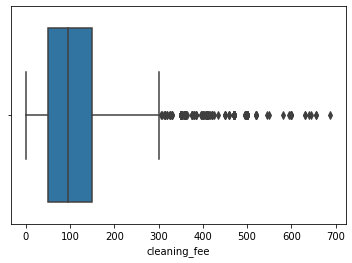

In [120]:
sns.boxplot(df2['cleaning_fee'])

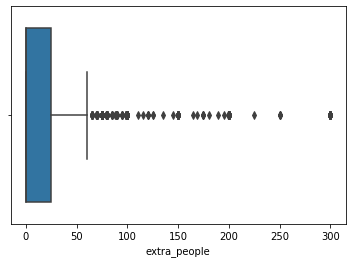

In [121]:
sns.boxplot(df2['extra_people'])

In [141]:
price_outliers = df2[df2['price'] >= 8000].index
df2.drop(price_outliers, inplace = True)

In [148]:
df2.to_csv('airbnb_data.csv',index=False)

In [149]:
#just testing pulling in the data
df3 = pd.read_csv('airbnb_data.csv', low_memory=False)

In [150]:
df3.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,https://www.airbnb.com/rooms/958,20191204162709,2019-12-04,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,f,f,moderate,f,f,1.0,1.0,0.0,0.0,1.79
1,3850.0,https://www.airbnb.com/rooms/3850,20191204162709,2019-12-04,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",...,f,f,strict_14_with_grace_period,f,f,3.0,0.0,3.0,0.0,1.38
2,5858.0,https://www.airbnb.com/rooms/5858,20191204162709,2019-12-05,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1.0,1.0,0.0,0.0,0.86
3,7918.0,https://www.airbnb.com/rooms/7918,20191204162709,2019-12-04,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9.0,0.0,9.0,0.0,0.14
4,8142.0,https://www.airbnb.com/rooms/8142,20191204162709,2019-12-04,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9.0,0.0,9.0,0.0,0.13
